## Aram Data and Analysis

In [310]:
# imports
from datetime import timedelta
from IPython.core.display import display
import league_constants

import league_data
import league_functions
import seaborn as sns
import importlib
import numpy as np

import pandas as pd
import cassiopeia as cass
importlib.reload(league_functions)
importlib.reload(league_constants)
importlib.reload(league_data)
from league_functions import *
from league_constants import *

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

#### TODO
-finish fuctions
<br> -new function ideas


#### Load Data

In [311]:
query = robb


In [312]:
df, s = league_data.load_fetch_data(query)

DATA LOADED 1598
0 NEW MATCHES SINCE 2022-09-24 22:41:25.616867
NO DATA ADDED



#### Clean data

In [313]:
df.sort_values(by="gameStartTimestamp", ascending=False, inplace=True)
df["items"] = df[["item0","item1","item2","item3","item4","item5"]].values.tolist()
df["items"] = df["items"].apply(lambda x:[i for i in x if i != 0])
df["gameVersion"] = df["gameVersion"].apply(lambda x: str.split(x, '.')[0:2])
df = df.drop(["item0","item1","item2","item3","item4","item5"], axis=1)
df = df.set_index("gameId", drop=True)
df.index.names = [None]

df.head(1)

,gameDuration,gameStartTimestamp,gameVersion,assists,bountyLevel,champExperience,champLevel,championId,championName,consumablesPurchased,damageDealtToTurrets,damageSelfMitigated,deaths,doubleKills,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,goldSpent,inhibitorKills,inhibitorTakedowns,inhibitorsLost,item6,itemsPurchased,killingSprees,kills,largestCriticalStrike,largestKillingSpree,largestMultiKill,longestTimeSpentLiving,magicDamageDealt,magicDamageDealtToChampions,magicDamageTaken,nexusKills,nexusLost,nexusTakedowns,pentaKills,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,quadraKills,spell1Casts,spell2Casts,spell3Casts,spell4Casts,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,summonerName,teamEarlySurrendered,teamId,timeCCingOthers,timePlayed,totalDamageDealt,totalDamageDealtToChampions,totalDamageShieldedOnTeammates,totalDamageTaken,totalHeal,totalHealsOnTeammates,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,totalUnitsHealed,tripleKills,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,turretTakedowns,turretsLost,unrealKills,win,perks,team,champs,other_team,other_champs,12AssistStreakCount,abilityUses,acesBefore15Minutes,bountyGold,damagePerMinute,damageTakenOnTeamPercentage,deathsByEnemyChamps,dodgeSkillShotsSmallWindow,doubleAces,earlyLaningPhaseGoldExpAdvantage,effectiveHealAndShielding,enemyChampionImmobilizations,flawlessAces,fullTeamTakedown,goldPerMinute,hadAfkTeammate,hadOpenNexus,highestChampionDamage,immobilizeAndKillWithAlly,kda,killAfterHiddenWithAlly,killParticipation,killedChampTookFullTeamDamageSurvived,killsNearEnemyTurret,killsOnRecentlyHealedByAramPack,killsUnderOwnTurret,killsWithHelpFromEpicMonster,knockEnemyIntoTeamAndKill,landSkillShotsEarlyGame,laneMinionsFirst10Minutes,laningPhaseGoldExpAdvantage,legendaryCount,lostAnInhibitor,maxCsAdvantageOnLaneOpponent,maxKillDeficit,maxLevelLeadLaneOpponent,multiKillOneSpell,multikills,multikillsAfterAggressiveFlash,outerTurretExecutesBefore10Minutes,outnumberedKills,outnumberedNexusKill,perfectGame,pickKillWithAlly,poroExplosions,quickCleanse,quickFirstTurret,quickSoloKills,riftHeraldTakedowns,saveAllyFromDeath,shortestTimeToAceFromFirstTakedown,skillshotsDodged,skillshotsHit,snowballsHit,soloKills,soloTurretsLategame,survivedSingleDigitHpCount,survivedThreeImmobilizesInFight,takedownOnFirstTurret,takedowns,takedownsAfterGainingLevelAdvantage,takedownsFirst25Minutes,takedownsInEnemyFountain,teamDamagePercentage,teleportTakedowns,tookLargeDamageSurvived,twentyMinionsIn3SecondsCount,visionScoreAdvantageLaneOpponent,visionScorePerMinute,mythicItemUsed,firstTurretKilledTime,highestCrowdControlScore,eligibleForProgression,takedownsFirstXMinutes,basicPings,fastestLegendary,items
4446213292,607,2022-09-24 22:24:43.916000-07:00,"[12, 18]",12,0,8087,11,12,Alistar,0,681,11421,4,0,False,False,True,False,False,False,6878,6100,0,1,0,2052,12,0,1,0,0,1,222,3342,2084,2711,0,0,1,0,1310,318,6252,0,15,14,9,3,13,32,3,4,Dirty Doughnut,False,200,23,607,5047,2797,678,12696,4860,3104,0,39,56,5,0,395,395,3732,0,4,1,0,True,"{'statPerks': {'defense': 5002, 'flex': 5002, ...",[-qllnaUawAXMc3A8mtZmm8RPulp01DM01NMlfKCifoH9O...,"[238, 21, 98, 99, 12]",[9uWAV-INwHBE7VEPJw6Twym7KDPqDvhLZSjGCgIn-UzTp...,"[29, 134, 127, 141, 59]",0.0,41.0,0.0,300.0,276.190083,0.263861,4.0,5.0,0.0,0.0,3782.572998,41.0,0.0,4.0,679.027206,NaN,0.0,NaN,6.0,3.25,1.0,0.722222,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,NaN,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,40.0,0.0,5.0,1.0,NaN,0.0,1.0,0.0,13.0,0.0,NaN,0.0,0.064371,NaN,0.0,0.0,-1.0,0.0,NaN,273.485619,NaN,1.0,13.0,4.0,NaN,"[2051, 3158, 3190, 3067, 1011]"


In [314]:
champs, adc, assassin, fighter, support, tank, mage = get_champ_roles()
item_id_to_name, champ_id_to_name, champ_name_to_id = get_id_mappings()


#### Filter

In [315]:
all = df
df = df[df.gameVersion.apply(lambda x: x[0] == "12")]
len(df)

977

In [316]:
solo = df[df.team.apply(lambda x: len({i for sublist in list(map(s.get, x)) for i in sublist} & friends - {query})) == 0]
premade = df[df.team.apply(lambda x: len({i for sublist in list(map(s.get, x)) for i in sublist} & friends - {query})) != 0]
all_solo = all[all.team.apply(lambda x: len({i for sublist in list(map(s.get, x)) for i in sublist} & friends - {query})) == 0]
all_premade = all[all.team.apply(lambda x: len({i for sublist in list(map(s.get, x)) for i in sublist} & friends - {query})) != 0]

print(percent(solo, df) + "% Games played alone now")
print(percent(all_solo, all) + "% Games played alone total")
print(len(premade), "low MMR games played")
print(len(all_premade), "low MMR games played total")

98.46% Games played alone now
96.87% Games played alone total
15 low MMR games played
50 low MMR games played total


In [317]:
wr(df)

'49.2% 481'

In [318]:
wr(solo)

'49.5% 476'

In [319]:
wr(premade)

'33.3% 5'

In [320]:
wr(all_premade)

'40.0% 20'

In [321]:
w = wl(df, filter=7).rename(index=champ_id_to_name)

w.sort_values("wr", ascending=False)

,wins,total,wr
Lillia,12,16,75.0
Hecarim,6,8,75.0
Senna,9,12,75.0
Ornn,5,7,71.0
Singed,26,39,67.0
Illaoi,14,21,67.0
Thresh,17,26,65.0
Alistar,13,20,65.0
Rumble,13,20,65.0
Taliyah,9,14,64.0


In [322]:
w = wl(all, filter=17).rename(index=champ_id_to_name)

w.sort_values("wr", ascending=False)

,wins,total,wr
Braum,12,17,71.0
Senna,14,20,70.0
Rumble,14,21,67.0
Illaoi,14,21,67.0
Twitch,12,18,67.0
Singed,28,43,65.0
Aphelios,11,17,65.0
Alistar,23,36,64.0
Taliyah,11,18,61.0
Malphite,11,18,61.0


In [323]:
adc_games = df[df.champs.apply(lambda x: len(set(map(champ_id_to_name.get, x)) & adc) != 0)]
no_adc_games = df[df.champs.apply(lambda x: len(set(map(champ_id_to_name.get, x)) & adc) == 0)]

In [324]:
wr(adc_games)

'49.9% 417'

In [325]:
wr(no_adc_games)

'45.1% 64'

#### Win Time distribution

<AxesSubplot:xlabel='gameDuration', ylabel='Count'>

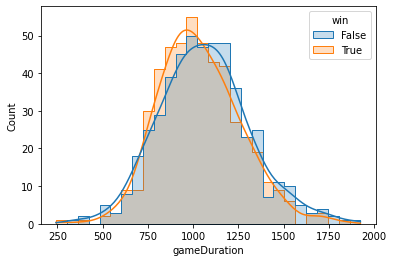

In [326]:
sns.histplot(df[["gameDuration","win"]], x="gameDuration", hue="win", element="step",kde=True)

In [327]:
df[df.win == True].gameDuration.describe().drop(["count","25%","50%","75%"]).apply(lambda x: str(int(x // 60))+"m "+str(int(x%60))+"s")

mean    17m 14s
std      3m 45s
min       4m 3s
max     30m 33s
Name: gameDuration, dtype: object

#### Loss Time distribution

In [328]:
df[df.win == False].gameDuration.describe().drop(["count","25%","50%","75%"]).apply(lambda x: str(int(x // 60))+"m "+str(int(x%60))+"s")

mean    17m 41s
std       4m 9s
min      5m 20s
max      32m 4s
Name: gameDuration, dtype: object

In [329]:
from collections import Counter

c = Counter(df.team.apply(list).sum() + df.other_team.apply(list).sum()).most_common()[1:400]
for i in c:
    print(s[i[0]], "=" ,i[1])


{'Reformed Monkeey'} = 55
{'Solo ßolo'} = 37
{'qmp', 'ai kitty', 'yuukiko', 'Lilyˇ'} = 36
{'Jeffˇ', 'hula', 'eggwich', 'taiyouko'} = 35
{'Tennen'} = 30
{'xRedNinjax'} = 29
{'YaphetsGGG'} = 28
{'Kushra', 'Kushra TV'} = 26
{'HelionRokin', 'Enilex'} = 26
{'Fearful'} = 25
{'pªndª', 'MoreSaltThanRice', 'Pandacreator'} = 24
{'IIIIIIOIIIIII'} = 24
{'Pomhubcom'} = 24
{'iskullllz'} = 24
{'Unseen Shadów', 'ZedShurikens'} = 24
{'Nitsuaa'} = 24
{'Oppai Senpai'} = 23
{'JustJeff'} = 23
{'5cupOfFreedOM', 'CrimeRoni', 'Opeus'} = 23
{'Sleep Patterns'} = 22
{'káchigga'} = 22
{'ToxickYasuo'} = 22
{'JustFalseX'} = 21
{'choar'} = 21
{'dps threat', 'chitoge chan', 'EXHAUST ME MORE'} = 20
{'lapsang souchong', 'callthefoulref', 'HumbleG0D'} = 20
{'DrLatency'} = 20
{'Jüan'} = 20
{'Yazoo'} = 20
{'Yozakura Family'} = 19
{'IittIe pogchamp'} = 19
{'möptöp'} = 18
{'Mai Gawd'} = 18
{'HoGenda', 'Mohõ'} = 18
{'Your Anpanman', 'Way Of Tomoe', 'subject of ymir'} = 18
{'NaabinDirty'} = 18
{'IllIllIllIlllI', 'CR Risen', '

In [330]:
max_wr = 0
gamer = ""
total = 0
for i in champs.index:
    curr, games = wr(df[df.champs.apply(lambda x: i in set(map(champ_id_to_name.get, x)))]).split()
    if int(games) > 10 and float(curr[:-1]) > max_wr:
        max_wr = float(curr[:-1])
        total = games
        gamer = i
print(f'{gamer}, wr: {max_wr}% in {total} games')

Riven, wr: 73.9% in 17 games


In [331]:

percents, count, sum, avg = role_distribution(df, champs, champ_id_to_name)
display(percents)
px.pie(count, values="win", names="role")

role
Assassin    48.78%
Fighter     50.51%
Mage        40.21%
Marksman    50.59%
Support      50.4%
Tank        55.36%
Name: win, dtype: object

In [332]:
px.pie(count, values="highestChampionDamage", names="role")

In [333]:
px.pie(avg, values="knockEnemyIntoTeamAndKill", names="role")

In [334]:
# px.pie(dist, values="win", names="role")

In [335]:
# px.pie(dist, values="win", names="role")

avg = avg.set_index("role")
avg

,gameDuration,assists,bountyLevel,champExperience,champLevel,championId,consumablesPurchased,damageDealtToTurrets,damageSelfMitigated,deaths,doubleKills,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,goldSpent,inhibitorKills,inhibitorTakedowns,inhibitorsLost,item6,itemsPurchased,killingSprees,kills,largestCriticalStrike,largestKillingSpree,largestMultiKill,longestTimeSpentLiving,magicDamageDealt,magicDamageDealtToChampions,magicDamageTaken,nexusKills,nexusLost,nexusTakedowns,pentaKills,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,quadraKills,spell1Casts,spell2Casts,spell3Casts,spell4Casts,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,teamEarlySurrendered,teamId,timeCCingOthers,timePlayed,totalDamageDealt,totalDamageDealtToChampions,totalDamageShieldedOnTeammates,totalDamageTaken,totalHeal,totalHealsOnTeammates,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,totalUnitsHealed,tripleKills,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,turretTakedowns,turretsLost,unrealKills,win,12AssistStreakCount,abilityUses,acesBefore15Minutes,bountyGold,damagePerMinute,damageTakenOnTeamPercentage,deathsByEnemyChamps,dodgeSkillShotsSmallWindow,doubleAces,earlyLaningPhaseGoldExpAdvantage,effectiveHealAndShielding,enemyChampionImmobilizations,flawlessAces,fullTeamTakedown,goldPerMinute,hadAfkTeammate,hadOpenNexus,highestChampionDamage,immobilizeAndKillWithAlly,kda,killAfterHiddenWithAlly,killParticipation,killedChampTookFullTeamDamageSurvived,killsNearEnemyTurret,killsOnRecentlyHealedByAramPack,killsUnderOwnTurret,killsWithHelpFromEpicMonster,knockEnemyIntoTeamAndKill,landSkillShotsEarlyGame,laneMinionsFirst10Minutes,laningPhaseGoldExpAdvantage,legendaryCount,lostAnInhibitor,maxCsAdvantageOnLaneOpponent,maxKillDeficit,maxLevelLeadLaneOpponent,multiKillOneSpell,multikills,multikillsAfterAggressiveFlash,outerTurretExecutesBefore10Minutes,outnumberedKills,outnumberedNexusKill,perfectGame,pickKillWithAlly,poroExplosions,quickCleanse,quickFirstTurret,quickSoloKills,riftHeraldTakedowns,saveAllyFromDeath,shortestTimeToAceFromFirstTakedown,skillshotsDodged,skillshotsHit,snowballsHit,soloKills,soloTurretsLategame,survivedSingleDigitHpCount,survivedThreeImmobilizesInFight,takedownOnFirstTurret,takedowns,takedownsAfterGainingLevelAdvantage,takedownsFirst25Minutes,takedownsInEnemyFountain,teamDamagePercentage,teleportTakedowns,tookLargeDamageSurvived,twentyMinionsIn3SecondsCount,visionScoreAdvantageLaneOpponent,visionScorePerMinute,mythicItemUsed,firstTurretKilledTime,highestCrowdControlScore,eligibleForProgression,takedownsFirstXMinutes,basicPings,fastestLegendary
role,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Assassin,1068.926829,16.146341,0.487805,16103.609756,15.634146,109.951220,0.634146,1173.853659,24982.121951,10.341463,2.048780,0.243902,0.219512,0.219512,0.048780,0.0,0.146341,12831.658537,11695.609756,0.170732,0.804878,1.073171,2052.000000,18.000000,3.000000,10.756098,82.926829,2.560976,2.146341,161.097561,12418.268293,6726.658537,11952.804878,0.048780,0.463415,0.195122,0.000000,36961.682927,17309.365854,13574.487805,0.048780,54.048780,51.926829,36.682927,16.097561,19.609756,26.219512,4.292683,4.000000,0.0,143.902439,19.463415,1068.926829,51178.536585,25388.365854,0.000000,27968.829268,5343.414634,14.146341,27.414634,151.243902,244.585366,1.146341,0.463415,1797.682927,1351.439024,2440.609756,0.512195,1.560976,2.487805,0.0,0.487805,0.075000,159.825000,1.375000,526.250000,1699.952054,0.234396,10.025000,107.225000,0.000000,0.024098,14.532446,5.000000,0.725000,6.575000,732.274511,0.000000,0.0,1.0,1.631579,2.737009,6.105263,0.698128,0.078947,2.900000,0.200000,1.925000,0.0,0.289474,20.925000,14.050000,0.030374,0.275000,0.125000,6.631579,1.350000,1.710526,0.025000,2.575000,0.450000,0.250000,3.925000,0.0,0.0,16.18421

In [336]:
avg.teamDamagePercentage

role
Assassin    0.226273
Fighter     0.193804
Mage        0.222959
Marksman    0.242160
Support     0.123521
Tank        0.151590
Name: teamDamagePercentage, dtype: float64

In [337]:
df[df.pentaKills>0][["championName","gameVersion","kda","pentaKills","teamDamagePercentage"]]


,championName,gameVersion,kda,pentaKills,teamDamagePercentage
4429133676,Kindred,"[12, 16]",8.250000,1,0.361086
4329861358,Samira,"[12, 10]",3.555556,1,0.348440
4294332277,Samira,"[12, 8]",3.071429,1,0.275742
4250542018,TahmKench,"[12, 5]",3.555556,1,0.224974


In [338]:
all["maj"] =  all.gameVersion.apply(lambda x: int(x[0]))
all["min"] =  all.gameVersion.apply(lambda x: int(x[1]))

pp = pd.DataFrame(all.groupby(["maj","min"]).apply(lambda x: wr(x, False)))
show = pp[pp.apply(lambda x: int(x.Win[x.Win.find(" "):]) + int(x.Loss[x.Loss.find(" "):]) >= 10, axis=1)]
all.drop(["maj","min"], axis=1, inplace=True)
show.drop("Loss", axis=1)


win           Win
maj min          
11  14   60.0% 12
    15   52.3% 69
    16   45.8% 22
    17   29.3% 12
    18   47.1% 16
    19   58.3% 28
    20   52.4% 33
    22   56.2% 18
    23   59.2% 45
    24   50.4% 62
12  1    50.0% 37
    2    44.8% 13
    3    46.4% 13
    4    44.2% 19
    5    52.1% 49
    6    52.8% 38
    7    52.1% 25
    8    49.2% 29
    9    43.8% 32
    10   63.0% 17
    11   48.6% 36
    12   40.7% 35
    14   38.5% 10
    15   61.8% 42
    16   54.2% 39
    17   44.8% 30
    18   41.9% 13

In [339]:
str(timedelta(seconds=int(round(df.gameDuration.sum()))))


'11 days, 20:29:56'

In [340]:
df.teamId.value_counts(normalize=True).mul(100).round(1).apply(lambda x: str(x) + "%").rename({100:"Blue", 200:"Red"})

Red     50.1%
Blue    49.9%
Name: teamId, dtype: object

In [341]:
df.groupby("teamId").apply(lambda x: wr(x, just_win=True)).rename({100:"Blue", 200:"Red"})

teamId
Blue    50.0% 244
Red     48.5% 237
dtype: object

In [342]:
# df[df.teamnames.apply(lambda x: "" in x)]
# df[df.enemynames.apply(lambda x: "DannyK" in x)]

In [343]:
df.iloc[400]

# win_rate(data)
# champ_winrate(data)
# champ_kda(robb, Aram_Data)
# kda(Aram_Data)
# kp(Aram_Data)
# common_teammates(Aram_Data)
# multikills(Aram_Data)
# items(Aram_Data)
# adc_winrate(data)
# time_played(Aram_Data)
# win_rate_with(thomas, Aram_Data)
# time_distribution(robb, data)


gameDuration                                          1045
gameStartTimestamp        2022-06-13 22:02:43.767000-07:00
gameVersion                                       [12, 11]
assists                                                  9
bountyLevel                                              0
                                        ...               
takedownsFirstXMinutes                                  12
basicPings                                             NaN
fastestLegendary                                       NaN
items                       [2051, 6662, 4637, 1001, 3116]
role                                               Fighter
Name: 4342052293, Length: 159, dtype: object

In [344]:
old = league_data.load_legacy_data(query)
old.sort_values("creation", inplace=True)
old.set_index("id", inplace=True, drop=True)
old.index.names = [None]
old.drop(np.intersect1d(all.index, old.index), inplace=True)
# old = old.loc[np.intersect1d(all.index, old.index)]


LEGACY DATA LOADED 3375


In [345]:
old["timePlayed"] = old.duration.apply(lambda x: x.seconds)
old["gameVersion"] = old.patch.apply(lambda x: str(x).split("."))
old["gameStartTimestamp"] = old.creation.apply(lambda x: x.to("US/Pacific").datetime)
old["teamId"] = old.side.apply(lambda x: 100 if x == 0 else 200)
old["win"] = old.summoner.apply(lambda x: bool(int(x.stats.win)))
old["assists"] = old.summoner.apply(lambda x: x.stats.assists)
old["champLevel"] = old.summoner.apply(lambda x: x.stats.level)
old["championName"] = old.summoner.apply(lambda x: x.champion)
old["championId"] = old.summoner.apply(lambda x: champ_name_to_id[x.champion])
old["damageDealtToTurrets"] = old.summoner.apply(lambda x: x.stats.damage_dealt_to_turrets)
old["damageSelfMitigated"] = old.summoner.apply(lambda x: x.stats.damage_self_mitigated)
old["deaths"] = old.summoner.apply(lambda x: x.stats.deaths)
old["firstBloodAssist"] = old.summoner.apply(lambda x: x.stats.first_blood_assist)
old["firstBloodKill"] = old.summoner.apply(lambda x: x.stats.first_blood_kill)
old["firstTowerAssist"] = old.summoner.apply(lambda x: x.stats.first_tower_assist)
old["firstTowerKill"] = old.summoner.apply(lambda x: x.stats.first_tower_kill)
old["goldEarned"] = old.summoner.apply(lambda x: x.stats.gold_earned)
old["goldSpent"] = old.summoner.apply(lambda x: x.stats.gold_spent)
old["inhibitorKills"] = old.summoner.apply(lambda x: x.stats.inhibitor_kills)
old["pentaKills"] = old.summoner.apply(lambda x: x.stats.penta_kills)
old["quardraKills"] = old.summoner.apply(lambda x: x.stats.quadra_kills)
old["tripleKills"] = old.summoner.apply(lambda x: x.stats.triple_kills)
old["doubleKills"] = old.summoner.apply(lambda x: x.stats.double_kills)
old["physicalDamageDealt"] = old.summoner.apply(lambda x: x.stats.physical_damage_dealt)
old["physicalDamageDealtToChampions"] = old.summoner.apply(lambda x: x.stats.physical_damage_dealt_to_champions)
old["physicalDamageTaken"] = old.summoner.apply(lambda x: x.stats.physical_damage_taken)
old["magicDamageDealt"] = old.summoner.apply(lambda x: x.stats.magic_damage_dealt)
old["magicDamageDealtToChampions"] = old.summoner.apply(lambda x: x.stats.magic_damage_dealt_to_champions)
old["magicalDamageTaken"] = old.summoner.apply(lambda x: x.stats.magical_damage_taken)

old["timeCCingOthers"] = old.summoner.apply(lambda x: x.stats.time_CCing_others)
old["totalDamageDealt"] = old.summoner.apply(lambda x: x.stats.total_damage_dealt)
old["totalDamageDealtToChampions"] = old.summoner.apply(lambda x: x.stats.total_damage_dealt_to_champions)
old["totalDamageTaken"] = old.summoner.apply(lambda x: x.stats.total_damage_taken)
old["totalHeal"] = old.summoner.apply(lambda x: x.stats.total_heal)
old["kills"] = old.summoner.apply(lambda x: x.stats.kills)
old["trueDamageDealt"] = old.summoner.apply(lambda x: x.stats.true_damage_dealt)
old["trueDamageDealtToChampions"] = old.summoner.apply(lambda x: x.stats.true_damage_dealt_to_champions)
old["trueDamageTaken"] = old.summoner.apply(lambda x: x.stats.true_damage_taken)
old["killingSprees"] = old.summoner.apply(lambda x: x.stats.killing_sprees)
old["turretKills"] = old.summoner.apply(lambda x: x.stats.turret_kills)
old["bountyLevel"] = old.summoner.apply(lambda x: x.stats.largest_killing_spree)
old["items"] = old.summoner.apply(lambda x: pd.Series(x.stats.items).apply(lambda l: l.id if l else None).dropna().tolist())

# old["bountyLevel"] = old.summoner.apply(lambda x: x.stats.largest_killing_spree)
# old["bountyLevel"] = old.summoner.apply(lambda x: x.stats.largest_killing_spree)
# old["bountyLevel"] = old.summoner.apply(lambda x: x.stats.largest_killing_spree)

In [346]:
# old = old.drop(["duration", "patch","creation","side", "surrender"], axis=1)
old.head(1)

,duration,patch,creation,surrender,blue,red,summoner,side,timePlayed,gameVersion,gameStartTimestamp,teamId,win,assists,champLevel,championName,championId,damageDealtToTurrets,damageSelfMitigated,deaths,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,goldEarned,goldSpent,inhibitorKills,pentaKills,quardraKills,tripleKills,doubleKills,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,magicDamageDealt,magicDamageDealtToChampions,magicalDamageTaken,timeCCingOthers,totalDamageDealt,totalDamageDealtToChampions,totalDamageTaken,totalHeal,kills,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,killingSprees,turretKills,bountyLevel,items
3095347699,0 days 00:18:02,9.13,2019-07-15T22:00:43.202000+00:00,False,"[(MzrSunDay, Kennen), (Sakuranna, Xerath), (Sh...","[(Dirty Doughnut, Thresh), (Frog69music, Camil...",summoner_spell_d: Mark\nsummoner_spell_f: Flas...,1,1082,"[9, 13]",2019-07-15 15:00:43.202000-07:00,200,False,17,15,Thresh,412,44,20867,8,False,True,False,False,9730,9200,0,0,0,0,0,6009,1796,7877,17261,9218,13351,44,26900,11324,22349,2726,3,3629,309,1119,0,0,0,"[3111.0, 3109.0, 3001.0, 3742.0, 2052.0]"


In [347]:
# wr(df[df.teamDamagePercentage> 0.4])
# df[df.teamDamagePercentage> 0.5]

In [348]:
all_old = all.append(old)
all_old.sort_values("gameStartTimestamp", ascending=False, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='gameStartTimestamp', ylabel='count'>

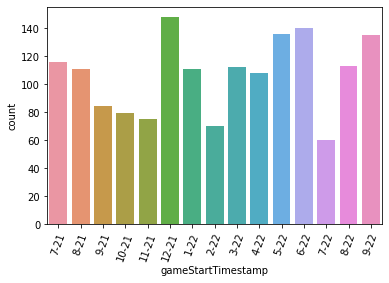

In [349]:

dates = all.gameStartTimestamp.apply(pd.Timestamp.to_pydatetime)
dates = dates.apply(lambda x: x.strftime('%-m-%y'))
# pd.DatetimeIndex(df.gameStartTimestamp).year
# pd.DatetimeIndex(df.gameStartTimestamp).month
chart = sns.countplot(dates.iloc[::-1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=70)
chart
# dates

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='gameStartTimestamp', ylabel='count'>

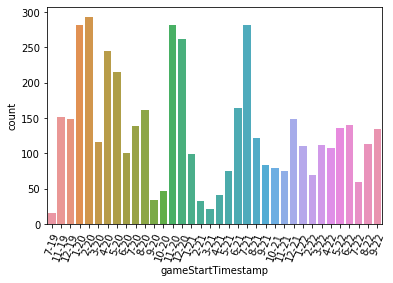

In [350]:

dates = all_old.gameStartTimestamp.apply(pd.Timestamp.to_pydatetime)
dates = dates.apply(lambda x: x.strftime('%-m-%y'))
# pd.DatetimeIndex(df.gameStartTimestamp).year
# pd.DatetimeIndex(df.gameStartTimestamp).month
chart = sns.countplot(dates.iloc[::-1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=70)
chart


In [351]:
c = Counter(all_old["items"].apply(list).sum()).most_common(1000)[1:]
for i in c:
    print(item_id_to_name.get(i[0]), "=" ,i[1])

Sorcerer's Shoes = 1731
Plated Steelcaps = 746
Rabadon's Deathcap = 713
Guardian's Horn = 694
None = 676
Berserker's Greaves = 650
Needlessly Large Rod = 563
Mercury's Treads = 554
Ionian Boots of Lucidity = 541
Demonic Embrace = 458
Infinity Edge = 396
Liandry's Anguish = 364
None = 361
Rylai's Crystal Scepter = 359
Oblivion Orb = 352
Blasting Wand = 336
Ruby Crystal = 327
Void Staff = 326
Warmog's Armor = 325
Spirit Visage = 309
Amplifying Tome = 306
Zhonya's Hourglass = 304
Muramana = 299
Long Sword = 293
None = 289
Luden's Tempest = 277
Sunfire Aegis = 256
Frostfire Gauntlet = 241
Sterak's Gage = 238
Evenshroud = 225
Guardian's Hammer = 222
Locket of the Iron Solari = 186
Lich Bane = 186
Giant's Belt = 183
Kindlegem = 182
Divine Sunderer = 181
Runaan's Hurricane = 181
Titanic Hydra = 175
Horizon Focus = 175
Fiendish Codex = 171
Boots of Swiftness = 169
Thornmail = 169
Phantom Dancer = 166
Guardian's Blade = 163
Youmuu's Ghostblade = 162
Eclipse = 156
The Collector = 156
None = 146


In [355]:
w = wl(all_old, filter=40).rename(index=champ_id_to_name)

w.sort_values("wr", ascending=False)


,wins,total,wr
Orianna,48,72,67.0
Kayle,31,46,67.0
Cassiopeia,41,62,66.0
Ryze,40,61,66.0
Singed,52,82,63.0
Alistar,34,54,63.0
Taliyah,32,52,62.0
Shyvana,28,45,62.0
Anivia,37,62,60.0
Senna,34,57,60.0


In [353]:

all_old[all_old.pentaKills>0][["championName","gameVersion","kda","pentaKills","teamDamagePercentage"]]

,championName,gameVersion,kda,pentaKills,teamDamagePercentage
4429133676,Kindred,"[12, 16]",8.250000,1,0.361086
4329861358,Samira,"[12, 10]",3.555556,1,0.348440
4294332277,Samira,"[12, 8]",3.071429,1,0.275742
4250542018,TahmKench,"[12, 5]",3.555556,1,0.224974
3994959841,Ryze,"[11, 15]",NaN,1,NaN
3965410077,Corki,"[11, 13]",NaN,1,NaN
3721616499,Fiddlesticks,"[10, 25]",NaN,1,NaN
3666879475,Samira,"[10, 23]",NaN,1,NaN
3527415225,Twitch,"[10, 16]",NaN,1,NaN
3510270644,Cassiopeia,"[10, 15]",NaN,1,NaN


In [354]:
all_old.championName.value_counts()

Thresh            101
Brand              94
Ashe               85
Singed             82
Xerath             74
                 ... 
Nunu & Willump      1
JarvanIV            1
Sejuani             1
Yone                1
Xin Zhao            1
Name: championName, Length: 171, dtype: int64